# Without feature extraction

In [1]:
#import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os 
from PIL import Image

In [2]:
#make a dictionary for every alphabet according to classes
class_names = ['A','B','C','D','E','F','G','H','I','K','L','O','P','Q','R','U','V','W','X','Y']
class_names_labels = {j:i for i,j in enumerate (class_names)}
print(class_names_labels)
IMAGE_SIZE = (50,50)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'O': 11, 'P': 12, 'Q': 13, 'R': 14, 'U': 15, 'V': 16, 'W': 17, 'X': 18, 'Y': 19}


In [3]:
#list directories of the file
entries = os.listdir("C:\\Users\\Acer\Desktop\\MACHINE LEARNING\\TML PROJECT DATASET")
for entry in entries:
    print(entry)


A
B
C
D
E
F
G
H
I
K
L
O
P
Q
R
U
V
W
X
Y


In [4]:

def load_data(): #create a function 
    images=[] #create an empty array for images
    labels=[] #create an empty array for labels
    path = "C:\\Users\\Acer\Desktop\\MACHINE LEARNING\\TML PROJECT DATASET" #declare the path 
    for folder in os.listdir(path): #The function iterates over each folder in the specified path using os.listdir(path). 
        label = class_names_labels[folder] #For each folder, the code retrieves the label associated with that folder using class_names_labels[folder]. 
        for file in os.listdir(os.path.join(path,folder)):
            if file.split('.')[-1] in {'jpg','png', 'jpeg'}: # checks if the file extension is one of {'jpg', 'png', 'jpeg'} 
                img_path = os.path.join(path,folder,file) #constructs the full path to the image file
                img = Image.open(img_path) #open the image path
                img = img.convert('RGB') #converts the image to RGB mode
                img = img.resize(IMAGE_SIZE) #The image is resized to a specified size (IMAGE_SIZE) which is 50 pixels of width and 50 pixels of height
                
                images.append(img)
                labels.append(label)
    images = np.array([np.array(i) for i in images]) #images converted to numpy array
    labels = np.array([np.array(i) for i in labels]) #labels converted to numpy array
    return images,labels

x,y = load_data() #load_data function is assigned to x and y

In [5]:
print(x.shape, y.shape) #print the dimensions of x and y

(2400, 50, 50, 3) (2400,)


In [6]:
y #return the dimensions in the form of array. It has 20 samples

array([ 0,  0,  0, ..., 19, 19, 19])

In [7]:
from sklearn.model_selection import train_test_split #import library for training, testing and splitting

In [8]:
#train test split for testing set with test size=0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                                                   random_state=42) 
#train test split for validation set with test size = 0.25
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train, 
                                                 test_size = 0.25, random_state=0)

In [9]:
#print the dimensions of training, testing and validation set
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)
print(y_valid.shape)
print(y_train.shape)
print(y_test.shape)

(1440, 50, 50, 3)
(480, 50, 50, 3)
(480, 50, 50, 3)
(480,)
(1440,)
(480,)


In [10]:
#flattening the training, testing and validation of x
x_train_flat = x_train.reshape(
    -1, x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_test_flat = x_test.reshape(
    -1, x_test.shape[1]*x_test.shape[2]*x_test.shape[3])
x_valid_flat = x_valid.reshape(
    -1, x_valid.shape[1]*x_valid.shape[2]*x_valid.shape[3])
print(x_train_flat.shape, x_test_flat.shape, x_valid_flat.shape)

(1440, 7500) (480, 7500) (480, 7500)


In [11]:
#normalization
x_train_flat = x_train_flat/255
x_valid_flat = x_valid_flat/255
x_test_flat  = x_test_flat/255

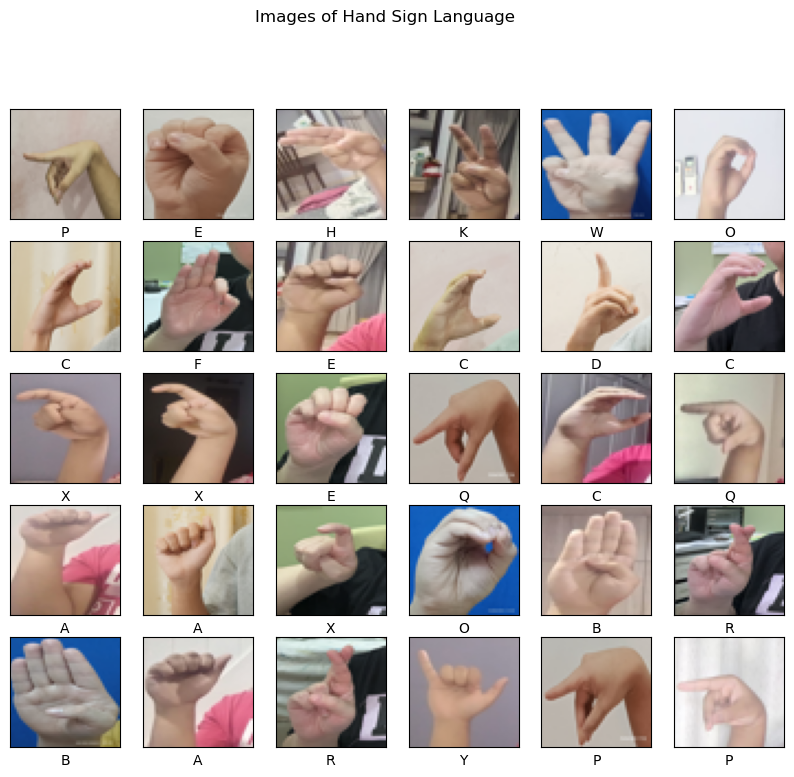

In [12]:
#show the random pics of the hand sign together with the alphabet label
fig = plt.figure(figsize=(10,10))
fig.suptitle("Images of Hand Sign Language")
for i in range(30):
    plt.subplot(6,6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [13]:
#import accuracy score and svm algorithm
from sklearn.metrics import accuracy_score
from sklearn import svm

In [34]:
#set hyperparameter values of svm and train the model
clf = svm.SVC(gamma=0.01, C=1000)
clf.fit(x_train_flat,y_train)

SVC(C=1000, gamma=0.01)

In [35]:
#print the training, validation and accuracy score of svm with the current hyperparameters
pred = clf.predict(x_train_flat)
print("Training accuracy: ",accuracy_score(y_train,pred))

pred = clf.predict(x_valid_flat)
print("Validation accuracy: ",accuracy_score(y_valid,pred))

pred = clf.predict(x_test_flat)
print("Testing accuracy: ",accuracy_score(y_test,pred))

Training accuracy:  1.0
Validation accuracy:  0.7291666666666666
Testing accuracy:  0.6854166666666667


In [36]:
accuracy_score(y_test,pred)

0.6854166666666667

In [37]:
#print classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, labels=clf.classes_))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        20
           1       0.71      0.67      0.69        30
           2       0.38      0.83      0.52        24
           3       0.96      0.84      0.90        31
           4       0.78      0.67      0.72        21
           5       0.94      0.64      0.76        25
           6       0.71      0.68      0.69        25
           7       0.81      0.63      0.71        27
           8       0.90      0.72      0.80        25
           9       0.73      0.40      0.52        20
          10       1.00      0.79      0.88        24
          11       0.88      0.88      0.88        24
          12       0.81      0.65      0.72        20
          13       0.60      0.71      0.65        17
          14       0.71      0.57      0.63        30
          15       0.46      0.79      0.58        24
          16       0.28      0.33      0.30        24
          17       0.43    

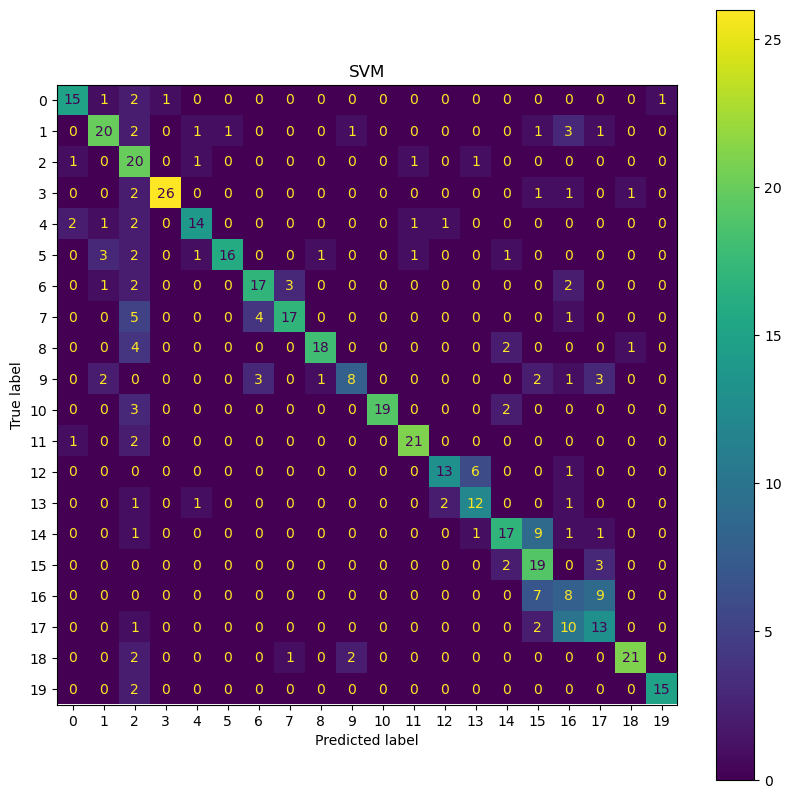

In [38]:
#print confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("SVM")
disp.plot(ax=ax)
plt.show()

In [20]:
#do cross validation 
from sklearn.model_selection import cross_val_score

clf = svm.SVC(gamma=0.01, C=1000)

scores = cross_val_score(clf,x_train_flat,y_train,cv = 5)

print(scores)

[0.72916667 0.6875     0.73611111 0.75347222 0.69097222]


In [21]:
#print the scores mean from the cross validation 
scores.mean()

0.7194444444444444

In [22]:
#import GridSearch to tune up the hyperparameters. GridSearch helps to find the best hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {'gamma':[1, 0.1, 0.01, 0.001, 0.0001], 'C':[0.1, 1, 10, 100, 1000], 'kernel':['rbf']}
            
clf = svm.SVC()
gs = GridSearchCV(clf, parameters, cv=5)
gs.fit(x_train_flat,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [23]:
#give the best hyperparameter values
print(gs.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [24]:
print(gs.best_estimator_)

SVC(C=100, gamma=0.001)


In [28]:
#print the new training, testing and validation accuracy score with the given hyperparameter values
pred2 = gs.predict(x_train_flat)
print("New Training accuracy: ",accuracy_score(y_train,pred2))

pred2 = gs.predict(x_valid_flat)
print("New Validation accuracy: ",accuracy_score(y_valid,pred2))

pred2 = gs.predict(x_test_flat)
print("New Testing accuracy: ",accuracy_score(y_test,pred2))

New Training accuracy:  1.0
New Validation accuracy:  0.8041666666666667
New Testing accuracy:  0.7770833333333333


In [29]:
#classification report of improved SVM
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.65      0.85      0.74        20
           1       0.76      0.83      0.79        30
           2       0.84      0.88      0.86        24
           3       0.97      0.94      0.95        31
           4       0.76      0.62      0.68        21
           5       0.83      0.76      0.79        25
           6       0.74      0.80      0.77        25
           7       0.80      0.74      0.77        27
           8       0.77      0.80      0.78        25
           9       0.86      0.60      0.71        20
          10       0.92      0.92      0.92        24
          11       1.00      0.88      0.93        24
          12       0.79      0.75      0.77        20
          13       0.52      0.76      0.62        17
          14       0.72      0.77      0.74        30
          15       0.64      0.75      0.69        24
          16       0.63      0.50      0.56        24
          17       0.60    

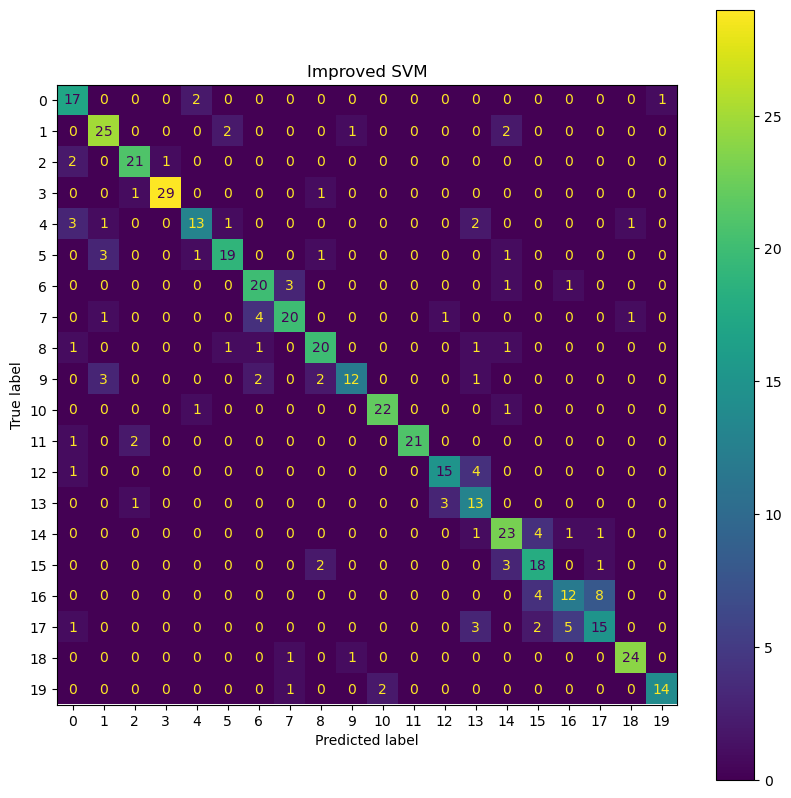

In [39]:
#confusion matrix of new SVM
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred2, labels=gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs.classes_)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Improved SVM")
disp.plot(ax=ax)
plt.show()

# With Feature Extraction LDA

In [40]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create an instance of LDA
lda = LinearDiscriminantAnalysis(n_components=18)

# Fit the LDA model with x_train data
lda.fit(x_train_flat, y_train)

# Transform the dataset using LDA
x_train_lda = lda.transform(x_train_flat)
x_valid_lda = lda.transform(x_valid_flat)
x_test_lda = lda.transform(x_test_flat)

print(x_train_lda.shape)
print(x_valid_lda.shape)
print(x_test_lda.shape)

(1440, 18)
(480, 18)
(480, 18)


In [41]:
clf = svm.SVC(gamma=0.001, C=100)
clf.fit(x_train_lda,y_train)

SVC(C=100, gamma=0.001)

In [42]:
pred = clf.predict(x_train_lda)
print("Training accuracy: ",accuracy_score(y_train,pred))

pred = clf.predict(x_valid_lda)
print("Validation accuracy: ",accuracy_score(y_valid,pred))

pred = clf.predict(x_test_lda)
print("Testing accuracy: ",accuracy_score(y_test,pred))

Training accuracy:  0.9986111111111111
Validation accuracy:  0.54375
Testing accuracy:  0.5541666666666667


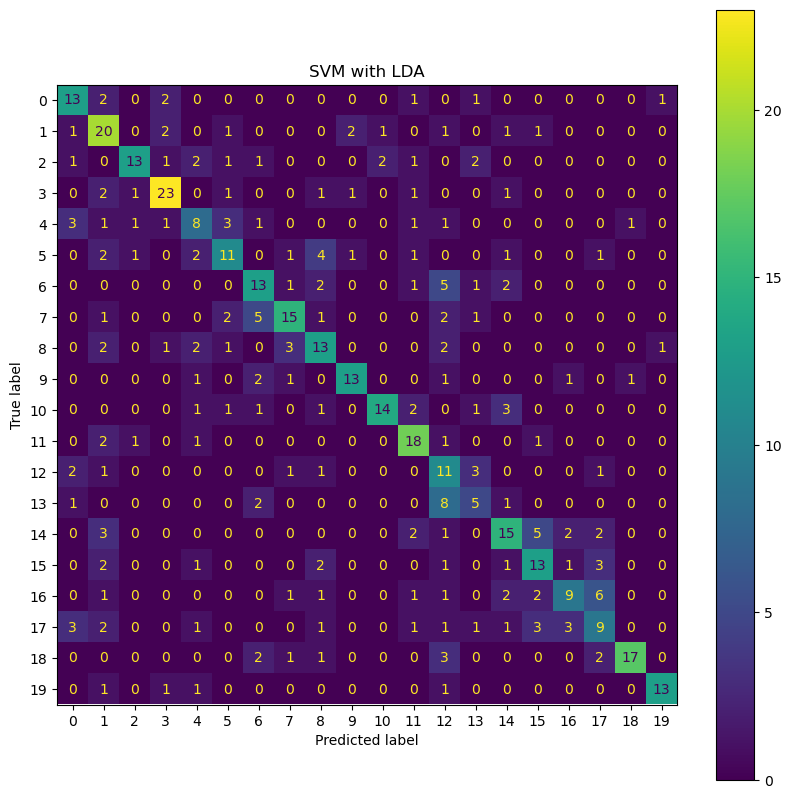

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("SVM with LDA")
disp.plot(ax=ax)
plt.show()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, labels=clf.classes_))

              precision    recall  f1-score   support

           0       0.54      0.65      0.59        20
           1       0.48      0.67      0.56        30
           2       0.76      0.54      0.63        24
           3       0.74      0.74      0.74        31
           4       0.40      0.38      0.39        21
           5       0.52      0.44      0.48        25
           6       0.48      0.52      0.50        25
           7       0.62      0.56      0.59        27
           8       0.46      0.52      0.49        25
           9       0.76      0.65      0.70        20
          10       0.82      0.58      0.68        24
          11       0.60      0.75      0.67        24
          12       0.28      0.55      0.37        20
          13       0.33      0.29      0.31        17
          14       0.54      0.50      0.52        30
          15       0.52      0.54      0.53        24
          16       0.56      0.38      0.45        24
          17       0.38    

# With Feature Extraction PCA

In [45]:
from sklearn.decomposition import PCA

# Create an instance of PCA
pca = PCA(n_components=20)

# Fit the PCA model with x_train data
pca.fit(x_train_flat)


# Transform the dataset using PCA
x_train_pca = pca.transform(x_train_flat)
x_valid_pca = pca.transform(x_valid_flat)
x_test_pca = pca.transform(x_test_flat)

print(x_train_pca.shape)
print(x_valid_pca.shape)
print(x_test_pca.shape)

(1440, 20)
(480, 20)
(480, 20)


In [46]:
clf = svm.SVC(gamma=0.001, C=100)
clf.fit(x_train_pca,y_train)

SVC(C=100, gamma=0.001)

In [47]:
pred = clf.predict(x_train_pca)
print("Training accuracy: ",accuracy_score(y_train,pred))

pred = clf.predict(x_valid_pca)
print("Validation accuracy: ",accuracy_score(y_valid,pred))

pred = clf.predict(x_test_pca)
print("Testing accuracy: ",accuracy_score(y_test,pred))

Training accuracy:  0.9680555555555556
Validation accuracy:  0.7354166666666667
Testing accuracy:  0.7270833333333333


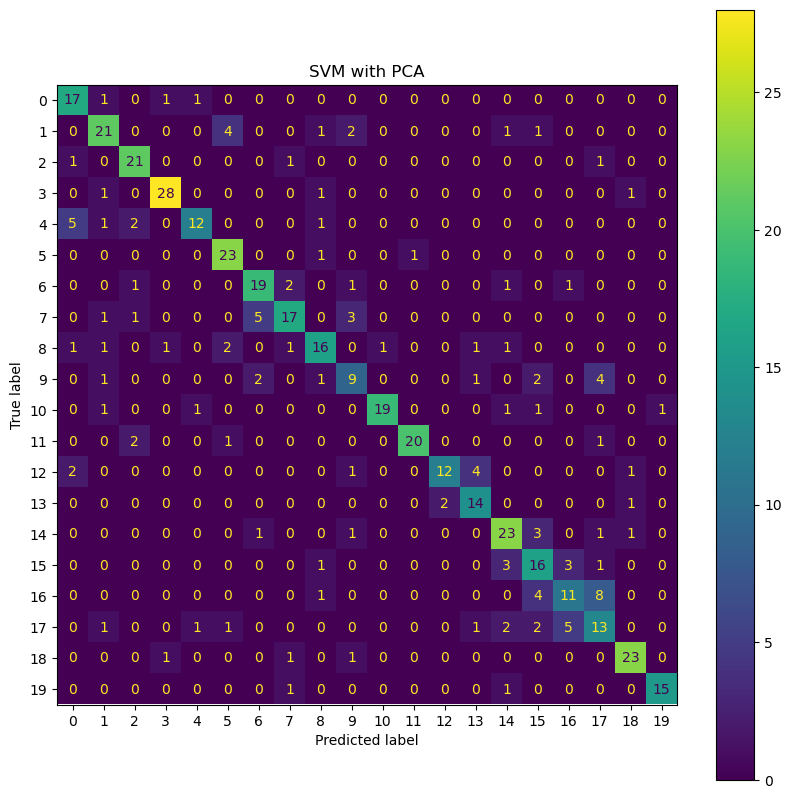

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("SVM with PCA")
disp.plot(ax=ax)
plt.show()

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, labels=clf.classes_))

              precision    recall  f1-score   support

           0       0.65      0.85      0.74        20
           1       0.72      0.70      0.71        30
           2       0.78      0.88      0.82        24
           3       0.90      0.90      0.90        31
           4       0.80      0.57      0.67        21
           5       0.74      0.92      0.82        25
           6       0.70      0.76      0.73        25
           7       0.74      0.63      0.68        27
           8       0.70      0.64      0.67        25
           9       0.50      0.45      0.47        20
          10       0.95      0.79      0.86        24
          11       0.95      0.83      0.89        24
          12       0.86      0.60      0.71        20
          13       0.67      0.82      0.74        17
          14       0.70      0.77      0.73        30
          15       0.55      0.67      0.60        24
          16       0.55      0.46      0.50        24
          17       0.45    